In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Classification task
* Mushroom Classification
* Finding which mushrooms are poisonous

In [2]:
df1 = pd.read_csv('./classification/mushrooms.csv')
df1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df1['cap-shape'].value_counts()

cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64

In [4]:
df1.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
df1.rename(columns={'class' : 'edibility'}, inplace=True)

In [6]:
df1

,edibility,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [7]:
df1.describe()

,edibility,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
import seaborn as sns

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edibility                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edibility                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## EDA
* Finding out which features are more important than the other
* Creating null values to put into the dataset
    * With numpy null

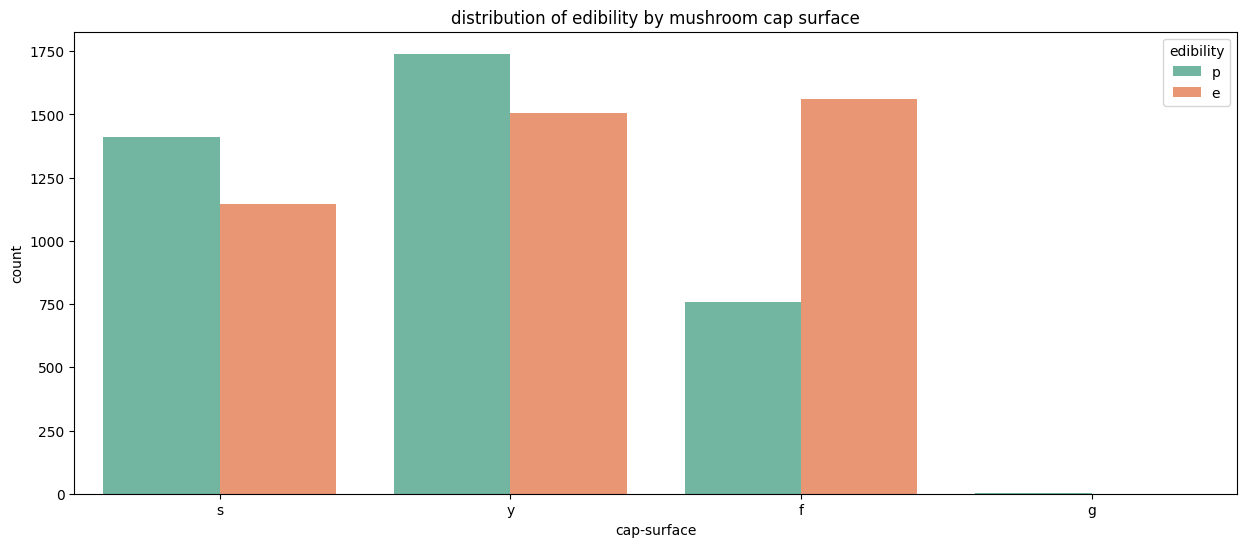

In [11]:
#Distribution of edibility by mushroom cap surface
plt.figure(figsize=(15,6))
sns.countplot(hue=df1['edibility'] , x=df1['cap-surface'],palette='Set2')

plt.title('distribution of edibility by mushroom cap surface')
plt.savefig('./1.png')
plt.show()

In [12]:
df1['cap-surface'].value_counts()

cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64

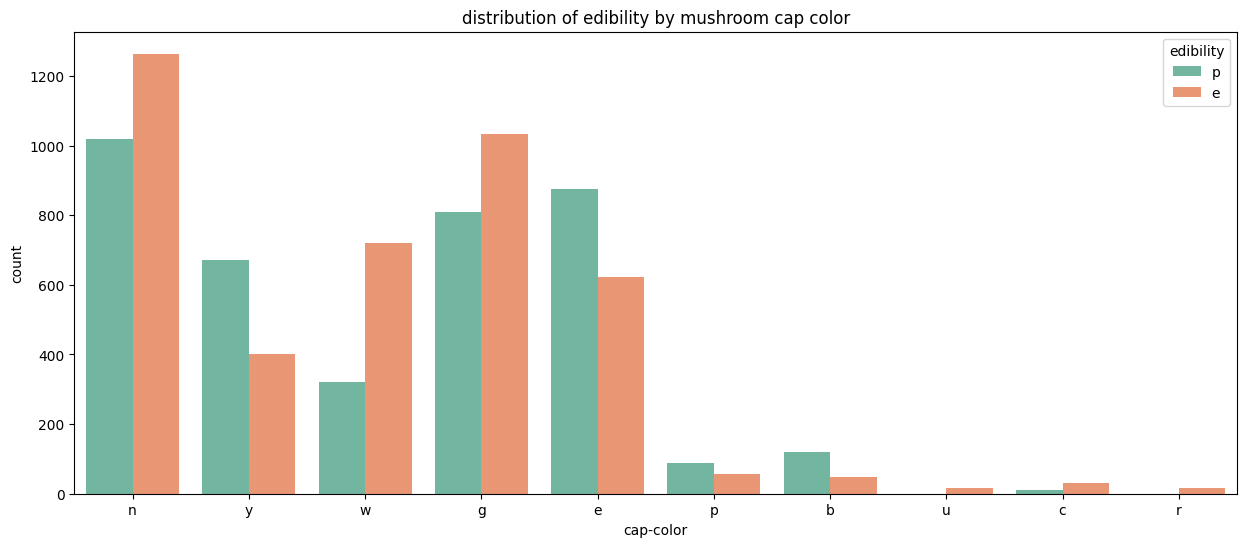

In [13]:
plt.figure(figsize=(15,6))
sns.countplot(hue=df1['edibility'], x=df1['cap-color'], palette='Set2')
plt.title('distribution of edibility by mushroom cap color')
plt.savefig('./2.png')
plt.show()

In [14]:
df1.head()

,edibility,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [15]:
df1['bruises'].replace({'f': 0, 't' : 1}, inplace=True)

/tmp/ipykernel_34805/4147652471.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['bruises'].replace({'f': 0, 't' : 1}, inplace=True)
/tmp/ipykernel_34805/4147652471.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['bruises'].replace({'f': 0, 't' : 1}, inplace=True)


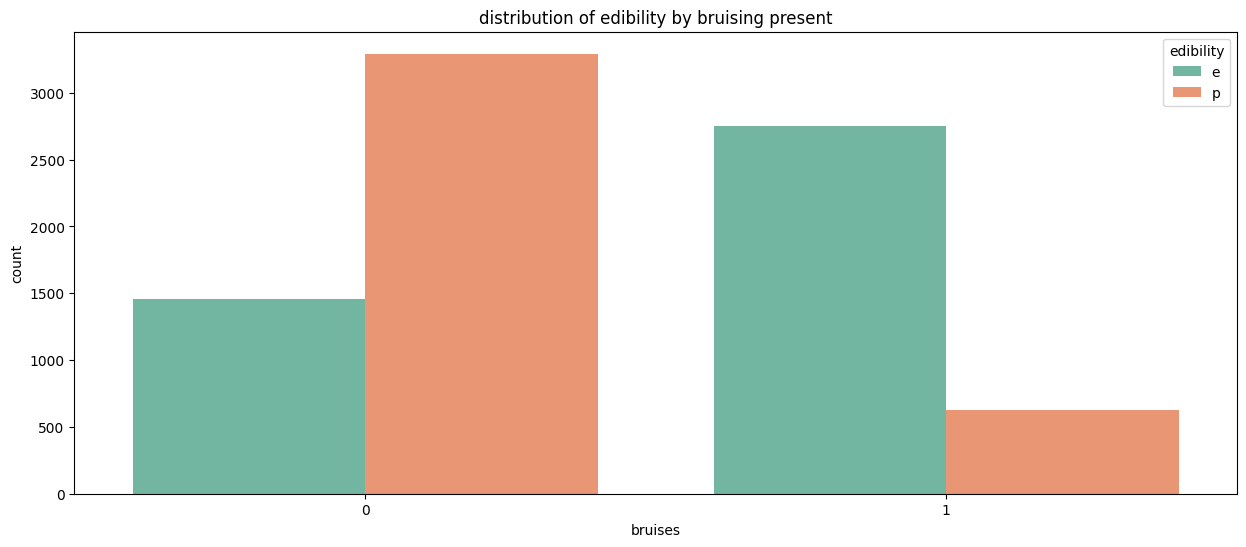

In [16]:
#Distribution of edibility by bruising present
plt.figure(figsize=(15,6))
sns.countplot(hue=df1['edibility'],x=df1['bruises'], palette='Set2')
plt.title('distribution of edibility by bruising present')
plt.savefig('./3.png')
plt.show()

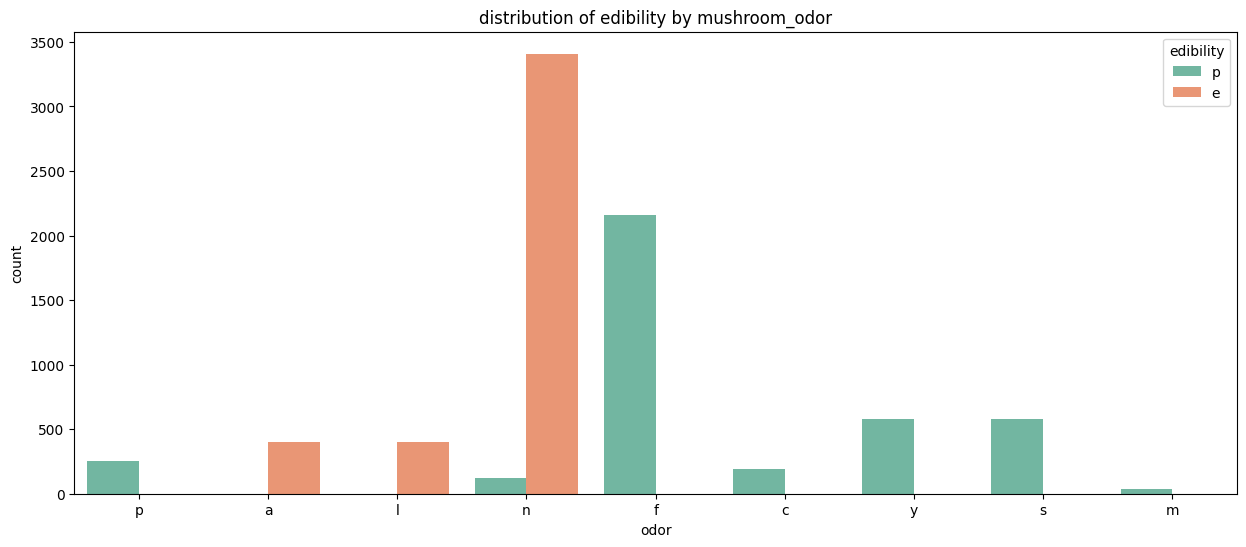

In [17]:
#Distribution of edibility by mushroom_odor
plt.figure(figsize=(15,6))
sns.countplot(hue=df1['edibility'],x=df1['odor'], palette='Set2')
plt.title('distribution of edibility by mushroom_odor')
plt.savefig('./4.png')
plt.show()

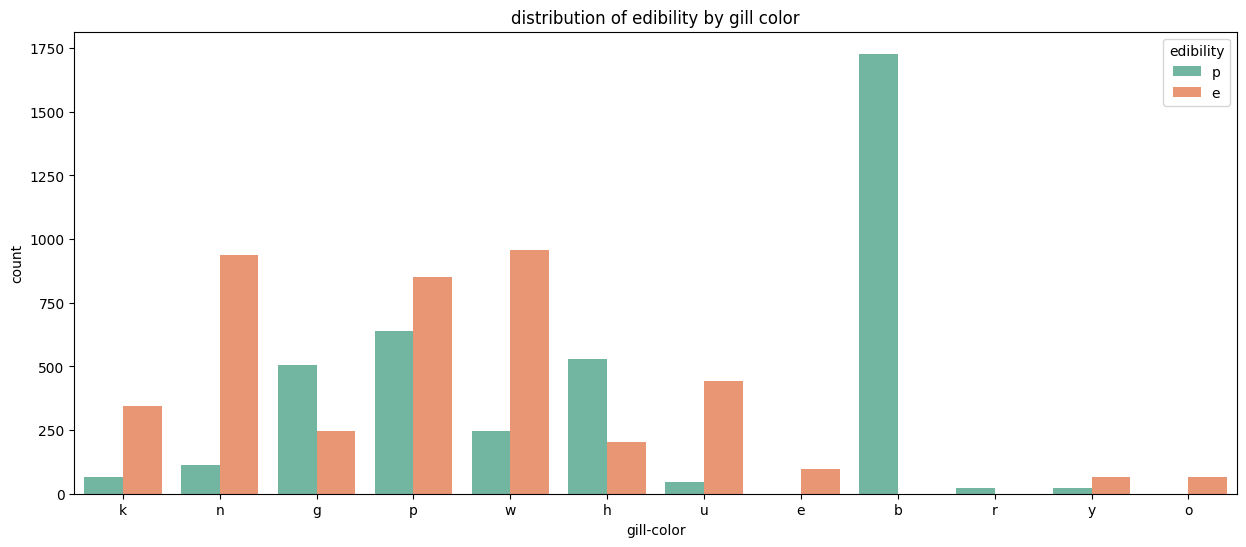

In [18]:
#Distribution of edibility by gill_color
plt.figure(figsize=(15,6))
sns.countplot(hue=df1['edibility'],x=df1['gill-color'], palette='Set2')
plt.title('distribution of edibility by gill color')
plt.savefig('./5.png')
plt.show()

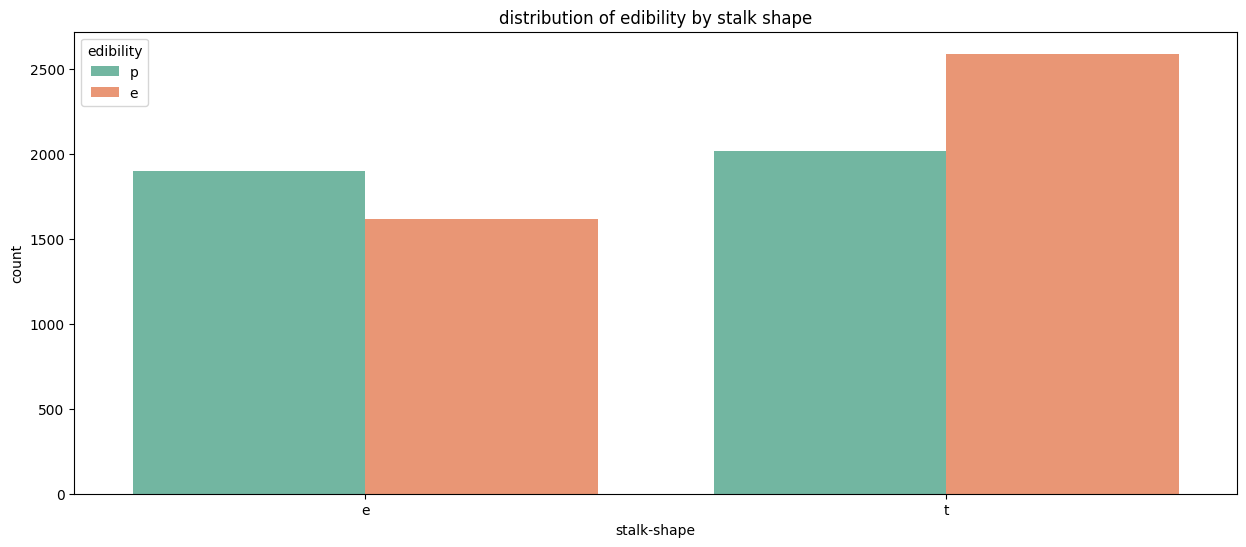

In [19]:
#Distribution of edibility by stalk_shape
plt.figure(figsize=(15,6))
sns.countplot(hue=df1['edibility'],x=df1['stalk-shape'], palette='Set2')
plt.title('distribution of edibility by stalk shape')
plt.savefig('./6.png')
plt.show()

In [20]:
df1.columns

Index(['edibility', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

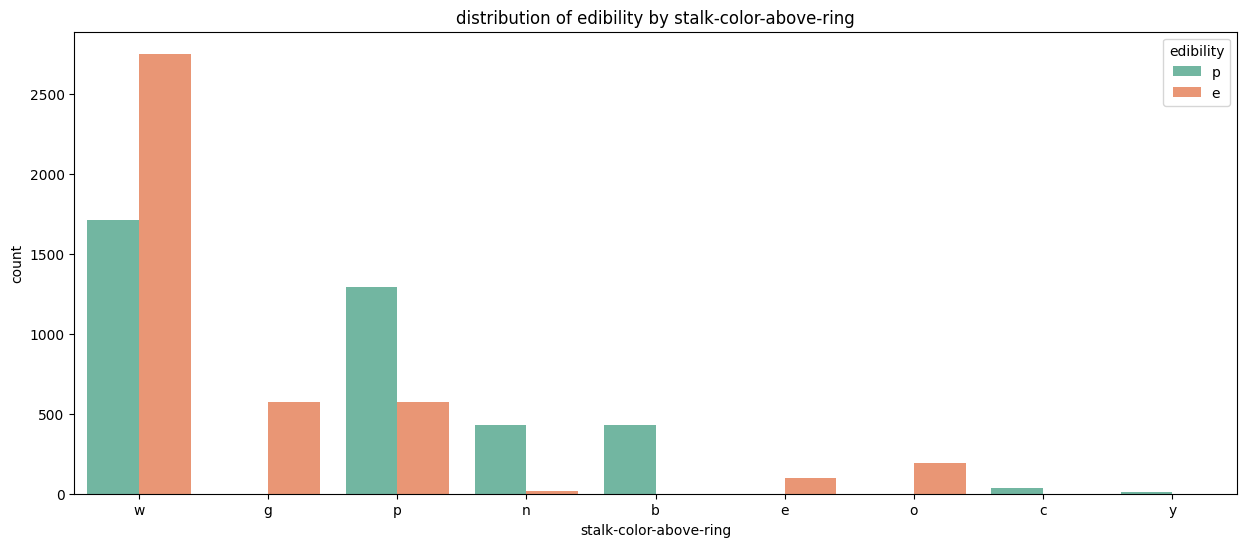

In [21]:
#Distribution of edibility by stalk_shape
plt.figure(figsize=(15,6))
sns.countplot(hue=df1['edibility'],x=df1['stalk-color-above-ring'], palette='Set2')
plt.title('distribution of edibility by stalk-color-above-ring')
plt.savefig('./7.png')
plt.show()

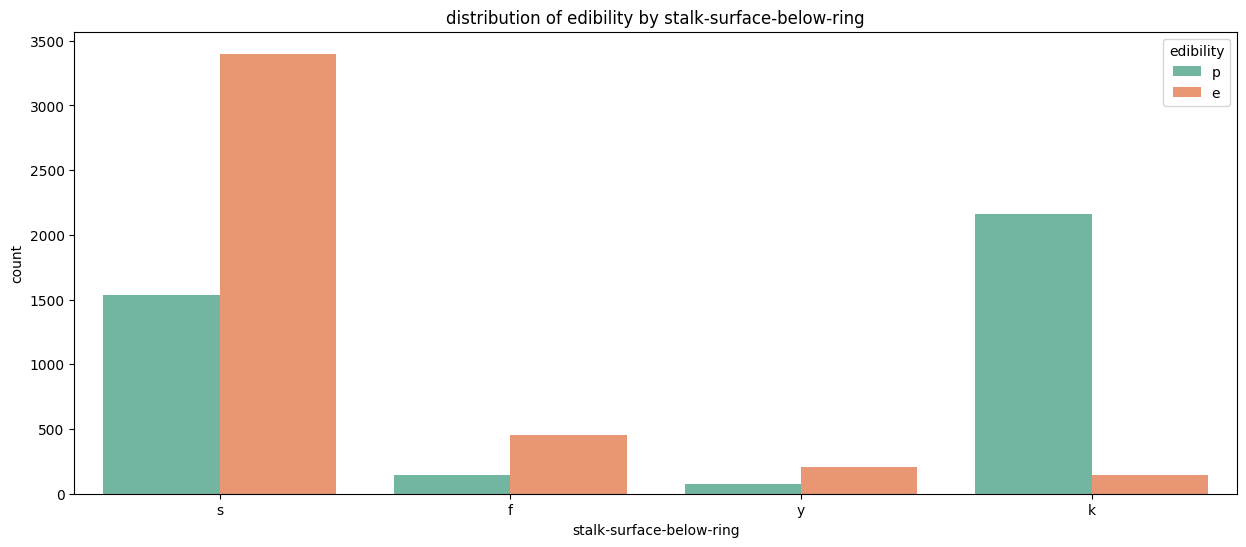

In [22]:
#Distribution of edibility by stalk_shape
plt.figure(figsize=(15,6))
sns.countplot(hue=df1['edibility'],x=df1['stalk-surface-below-ring'], palette='Set2')
plt.title('distribution of edibility by stalk-surface-below-ring')
plt.savefig('./8.png')
plt.show()

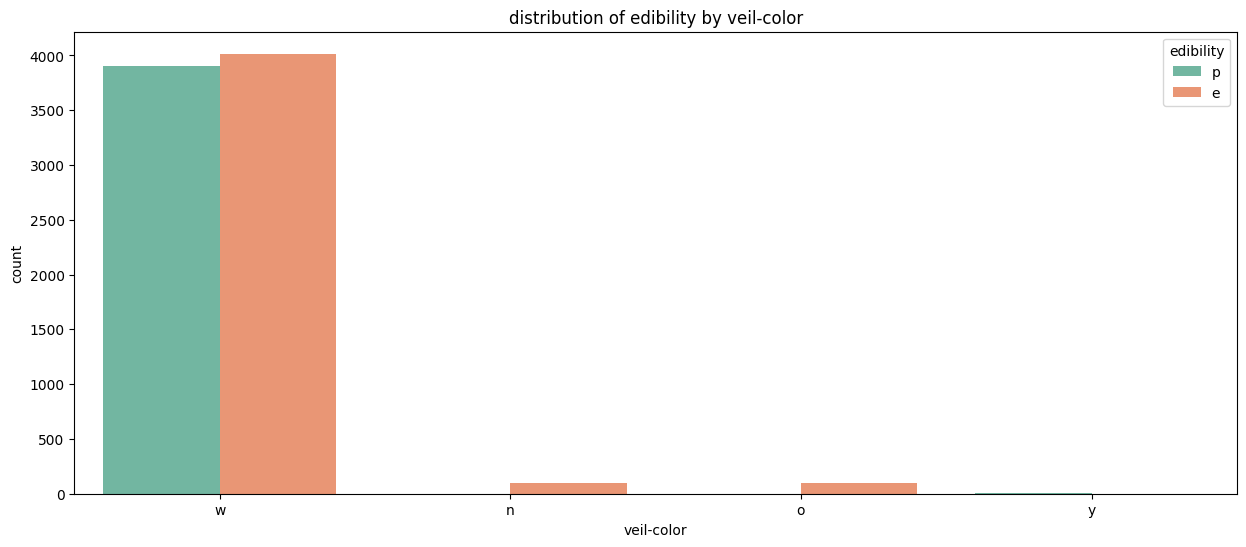

In [23]:
#Distribution of edibility by stalk_shape
plt.figure(figsize=(15,6))
sns.countplot(hue=df1['edibility'],x=df1['veil-color'], palette='Set2')
plt.title('distribution of edibility by veil-color')
plt.savefig('./9.png')
plt.show()

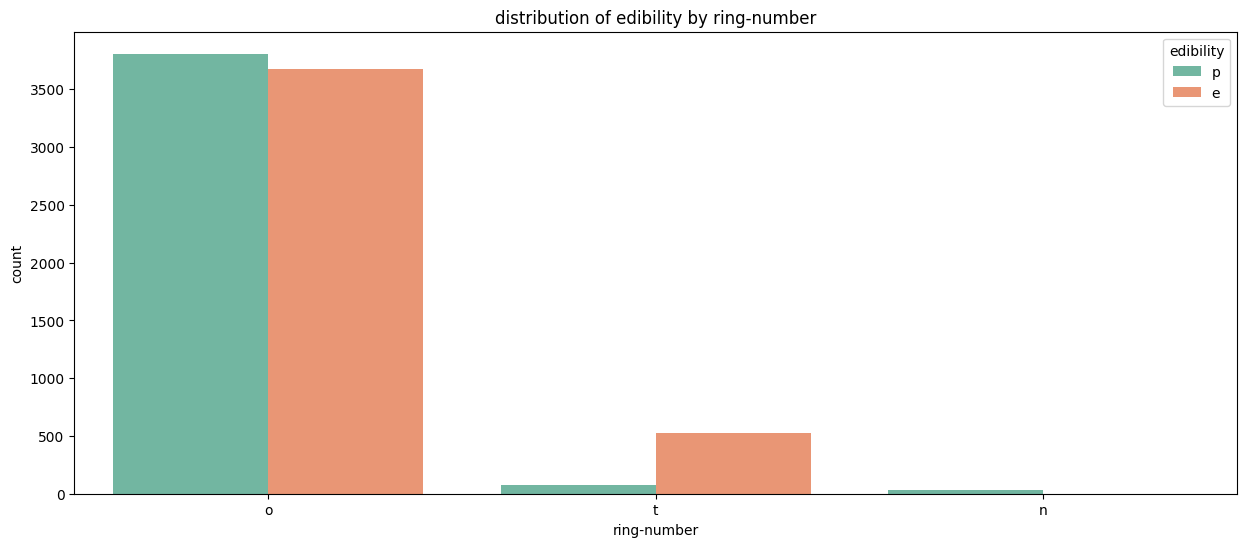

In [24]:
#Distribution of edibility by stalk_shape
plt.figure(figsize=(15,6))
sns.countplot(hue=df1['edibility'],x=df1['ring-number'], palette='Set2')
plt.title('distribution of edibility by ring-number')
plt.savefig('./10.png')
plt.show()

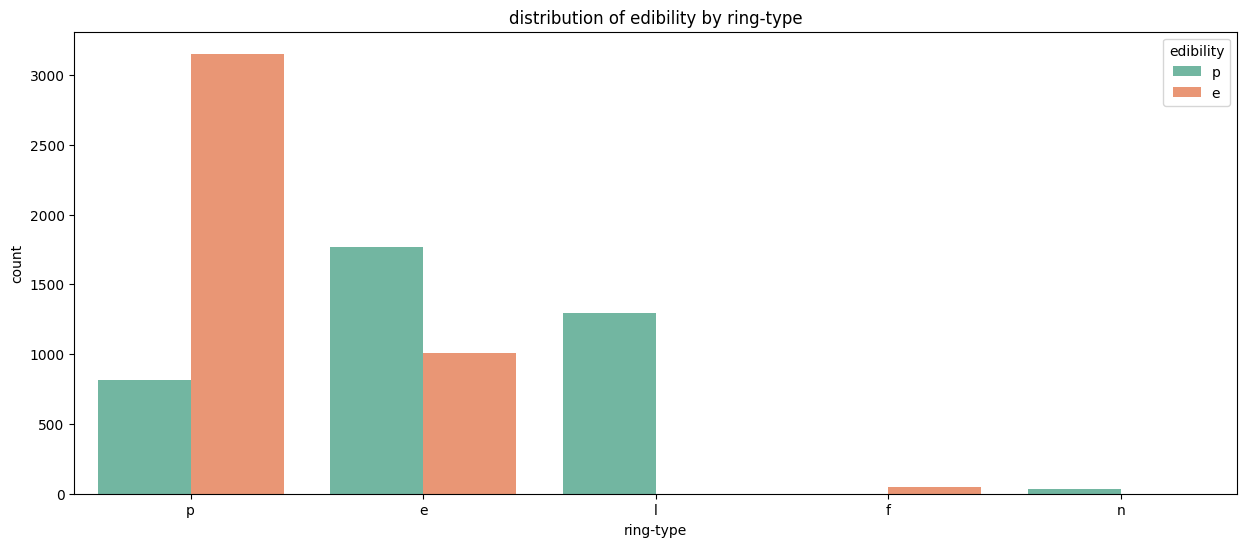

In [25]:
#Distribution of edibility by stalk_shape
plt.figure(figsize=(15,6))
sns.countplot(hue=df1['edibility'],x=df1['ring-type'], palette='Set2')
plt.title('distribution of edibility by ring-type')
plt.savefig('./11.png')
plt.show()

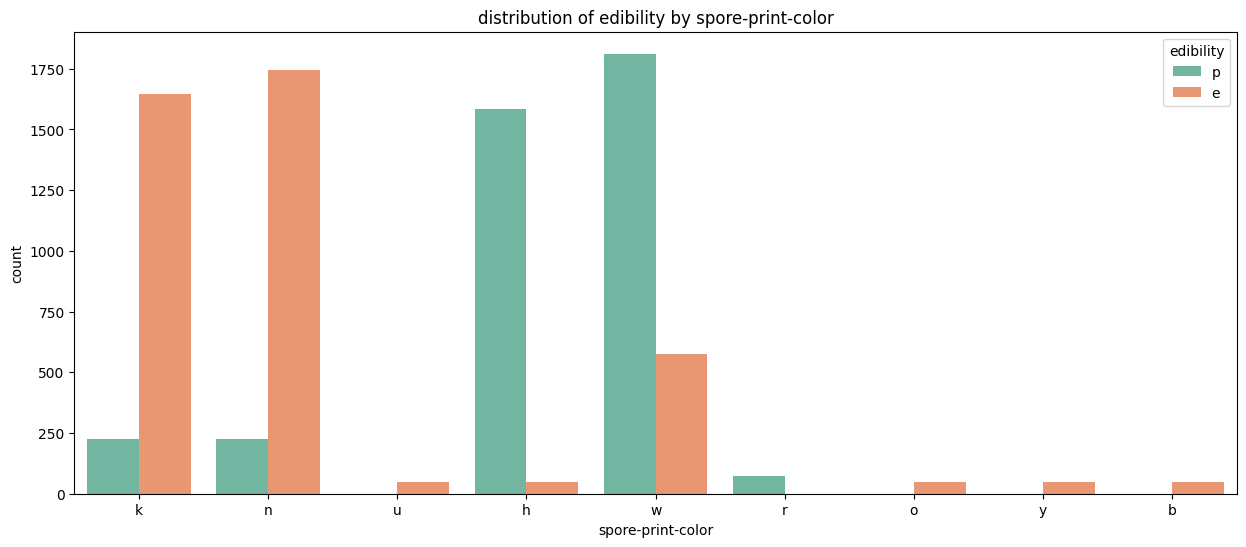

In [26]:
#Distribution of edibility by stalk_shape
plt.figure(figsize=(15,6))
sns.countplot(hue=df1['edibility'],x=df1['spore-print-color'], palette='Set2')
plt.title('distribution of edibility by spore-print-color')
plt.savefig('./12.png')
plt.show()

In [27]:
df1['cap-color'].value_counts()

cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64

In [28]:
df1['edibility'].value_counts()

edibility
e    4208
p    3916
Name: count, dtype: int64

In [29]:
df1['edibility'].replace({'p': 0, 'e' : 1}, inplace=True)

/tmp/ipykernel_34805/3010395641.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['edibility'].replace({'p': 0, 'e' : 1}, inplace=True)
/tmp/ipykernel_34805/3010395641.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['edibility'].replace({'p': 0, 'e' : 1}, inplace=True)


In [30]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [31]:
## Finding interest_columns after EDA

interest_columns=['gill-color','stalk-color-above-ring',
                 'stalk-surface-below-ring','veil-color','ring-number','ring-type',
                  'spore-print-color','edibility']

# interest_columns=['edibility',
#                   'cap-shape',
#                   'cap-surface',
#                   'cap-color',
#                   'bruises',
#                   'odor',
#                   'gill-attachment',
#                   'gill-spacing',
#                   'gill-size',
#                   'gill-color',
#                   'stalk-shape',
#                   'stalk-root',
#                   'stalk-surface-above-ring',
#                   'stalk-surface-below-ring',
#                   'stalk-color-above-ring',
#                   'stalk-color-below-ring',
#                   'veil-type',
#                   'veil-color',
#                   'ring-number',
#                   'ring-type',
#                   'spore-print-color',
#                   'population',
#                   'habitat']
df1_main = df1[interest_columns]

In [32]:
df1_main.columns

Index(['gill-color', 'stalk-color-above-ring', 'stalk-surface-below-ring',
       'veil-color', 'ring-number', 'ring-type', 'spore-print-color',
       'edibility'],
      dtype='object')

In [33]:
label = LabelEncoder()
df1_encoded = df1_main.copy()
for i in df1_main:
    df1_encoded[i] = label.fit_transform(df1_encoded[i])

In [34]:
df1_encoded.head()

,gill-color,stalk-color-above-ring,stalk-surface-below-ring,veil-color,ring-number,ring-type,spore-print-color,edibility
0,4,7,2,2,1,4,2,0
1,4,7,2,2,1,4,3,1
2,5,7,2,2,1,4,3,1
3,5,7,2,2,1,4,2,0
4,4,7,2,2,1,0,3,1


In [35]:
df1_encoded.describe()

,gill-color,stalk-color-above-ring,stalk-surface-below-ring,veil-color,ring-number,ring-type,spore-print-color,edibility
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,4.810684,5.816347,1.603644,1.965534,1.069424,2.291974,3.596750,0.517971
std,3.540359,1.901747,0.675974,0.242669,0.271064,1.801672,2.382663,0.499708
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,6.000000,1.000000,2.000000,1.000000,0.000000,2.000000,0.000000
50%,5.000000,7.000000,2.000000,2.000000,1.000000,2.000000,3.000000,1.000000
75%,7.000000,7.000000,2.000000,2.000000,1.000000,4.000000,7.000000,1.000000
max,11.000000,8.000000,3.000000,3.000000,2.000000,4.000000,8.000000,1.000000


In [36]:
X = df1_encoded.drop('edibility', axis = 1)
y = df1_encoded['edibility']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, test_size=0.2)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import r2_score

In [39]:
dict_models={
    'logistic':LogisticRegression(max_iter=1000),
    'SVM':SVC(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'XGBOOT':XGBClassifier(),
    'Adaboost':AdaBoostClassifier()
}

In [40]:
models_train=[]
accuracy_train=[]
accuracy_test=[]

In [41]:
## Training models
for i in range(len(list(dict_models))):
    model = list(dict_models.values())[i]
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    acc_train=r2_score(y_pred_train, y_train)

    y_pred_test = model.predict(X_test)
    acc_test=r2_score(y_pred_test, y_test)

    accuracy_train.append(acc_train)
    accuracy_test.append(acc_test)

    print('\n',list(dict_models)[i],'\n accuracy train =',acc_train ,'\n accuracy test =',acc_test ,'\n ------------------------------------')


 logistic 
 accuracy train = 0.17028884170484926 
 accuracy test = 0.16901497665594478 
 ------------------------------------

 SVM 
 accuracy train = 0.6502489414356493 
 accuracy test = 0.617354598698413 
 ------------------------------------

 Decision Tree 
 accuracy train = 0.7774749923105345 
 accuracy test = 0.7630519222655183 
 ------------------------------------

 Random Forest 
 accuracy train = 0.7774749923105345 
 accuracy test = 0.7630519222655183 
 ------------------------------------

 XGBOOT 
 accuracy train = 0.7774749923105345 
 accuracy test = 0.7630519222655183 
 ------------------------------------

 Adaboost 
 accuracy train = 0.741899529115198 
 accuracy test = 0.7056323504821358 
 ------------------------------------


/home/tckleme/Documents/Projects/envs/bcc/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [42]:
list(dict_models)

['logistic', 'SVM', 'Decision Tree', 'Random Forest', 'XGBOOT', 'Adaboost']

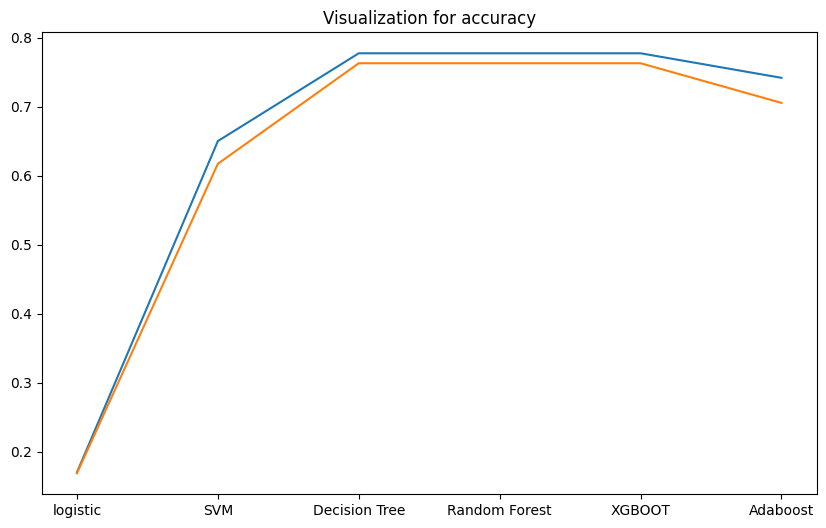

In [44]:
plt.figure(figsize=(10,6))
sns.lineplot(x=list(dict_models),y=accuracy_train)
sns.lineplot(x=list(dict_models),y=accuracy_test)

plt.title('Visualization for accuracy')

plt.savefig('./13.png')
plt.show()